<a href="https://colab.research.google.com/github/sinancc/MA22C026_2023_PL/blob/main/Assignments/Assignment_3/rise_of_Co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import urllib.request
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
murl = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
f = '../../data_external/Rise_of_co2.txt'


In [ ]:
if not os.path.isdir('../../data_external/'):
  os.mkdir('../../data_external/')
r = urllib.request.urlopen(url)
fo = open(f, 'wb')
shutil.copyfileobj(r, fo)
fo.close()

In [ ]:
# lines = open(f, 'r').readlines()

In [ ]:
# lines

In [ ]:
data = np.genfromtxt(f, skip_header=72, usecols=(0,1,2,3), dtype=None, names=("year", "month", "date","average"))

In [ ]:
data['average'] = np.ma.masked_invalid(data['average'])

In [ ]:
df = pd.DataFrame(data)

In [18]:
column_names = ['year', 'Month', 'date','Average']
df.columns = column_names

In [19]:
df

,year,Month,date,Average
0,1959,5,1959.3699,318.29
1,1959,6,1959.4548,318.15
2,1959,7,1959.5370,316.54
3,1959,8,1959.6219,314.80
4,1959,9,1959.7068,313.84
...,...,...,...,...
766,2023,3,2023.2083,420.98
767,2023,4,2023.2917,423.36
768,2023,5,2023.3750,424.00
769,2023,6,2023.4583,423.68


In [20]:
date = data['date']
monthly_averages= data['average']

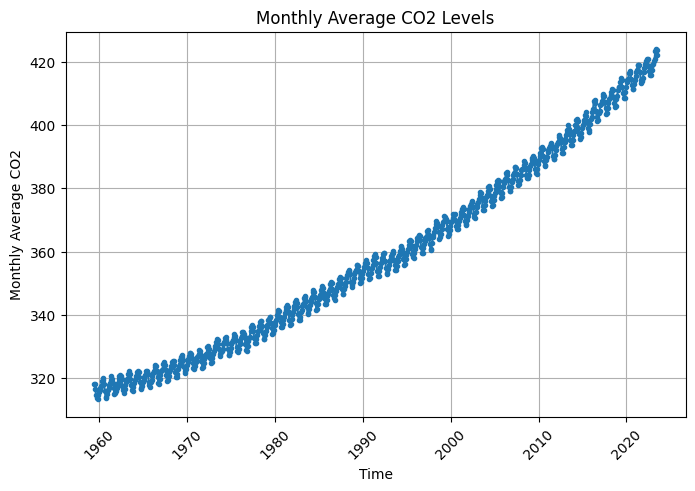

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(date, monthly_averages, marker='.')
plt.xlabel('Time')
plt.ylabel('Monthly Average CO2')
plt.title('Monthly Average CO2 Levels')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
rate_of_change = np.diff(monthly_averages)

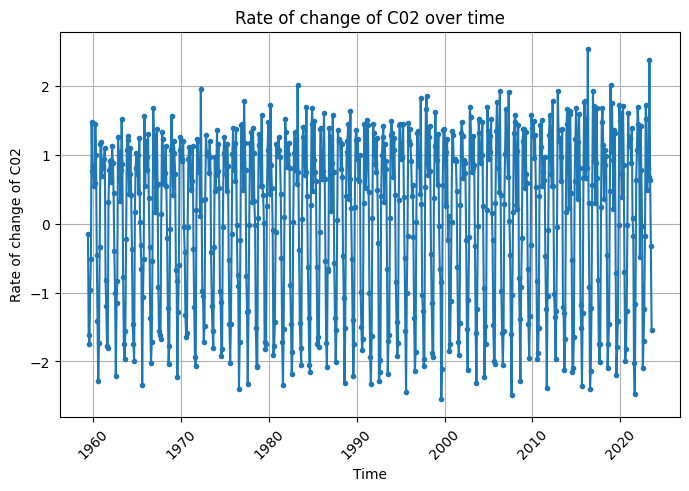

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(date[1:], rate_of_change, marker='.')
plt.xlabel('Time')
plt.ylabel('Rate of change of C02')
plt.title('Rate of change of C02 over time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()